In [9]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import yellowbrick as yb

from yellowbrick.features import RadViz
from yellowbrick.features import FeatureImportances

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()

In [22]:
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"featureSTG\" ", con=conn)
#code to be able to view all the columns in pandas dataframe
pd.set_option('display.max_columns', 50)

df_temp = df.loc[(df.year == 0)] #only social science classes 2013

df_temp = df_temp[["final_result", "gender", "highest_education", "allclicks","tma_cma_assmt_score", 
               "num_of_prev_attempts", "year", "term", "studied_credits", "disability"]]

#remove null values
df_temp = df_temp.dropna()

#check to see the correct table was imported
df_temp.head()  

,final_result,gender,highest_education,allclicks,tma_cma_assmt_score,num_of_prev_attempts,year,term,studied_credits,disability
2,0,0,3,646.0,34.90,0,0,0,90,0
4,1,0,3,934.0,82.40,0,0,0,240,0
5,0,1,1,161.0,16.69,2,0,1,60,0
8,1,0,2,590.0,89.24,0,0,0,60,0
12,1,0,2,712.0,0.00,0,0,0,30,0


In [23]:
X = df_temp[["gender", "highest_education", "allclicks","num_of_prev_attempts", "studied_credits"]].values
        
y = df_temp["final_result"].values

In [5]:
#Rad_Viz
# Load the classification dataset
#X, y = df_temp

# Specify the target classes
# #classes = ["0", "1"]

# # Instantiate the visualizer
# visualizer = RadViz(classes=classes)

# visualizer.fit(X, y)           # Fit the data to the visualizer
# visualizer.transform(X)        # Transform the data
# visualizer.show()              # Finalize and render the figure

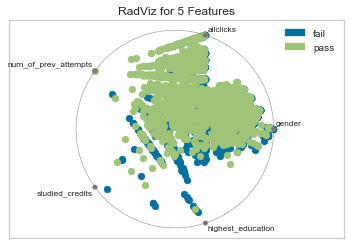

In [24]:
classes = ["fail", "pass"]
features = ["gender", "allclicks","num_of_prev_attempts", "studied_credits","highest_education"]
        

# Instantiate the visualizer
visualizer = RadViz (
    classes=classes,
    features = features
)

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Draw the data

In [7]:
y

array([1, 0, 0, ..., 1, 0, 1])

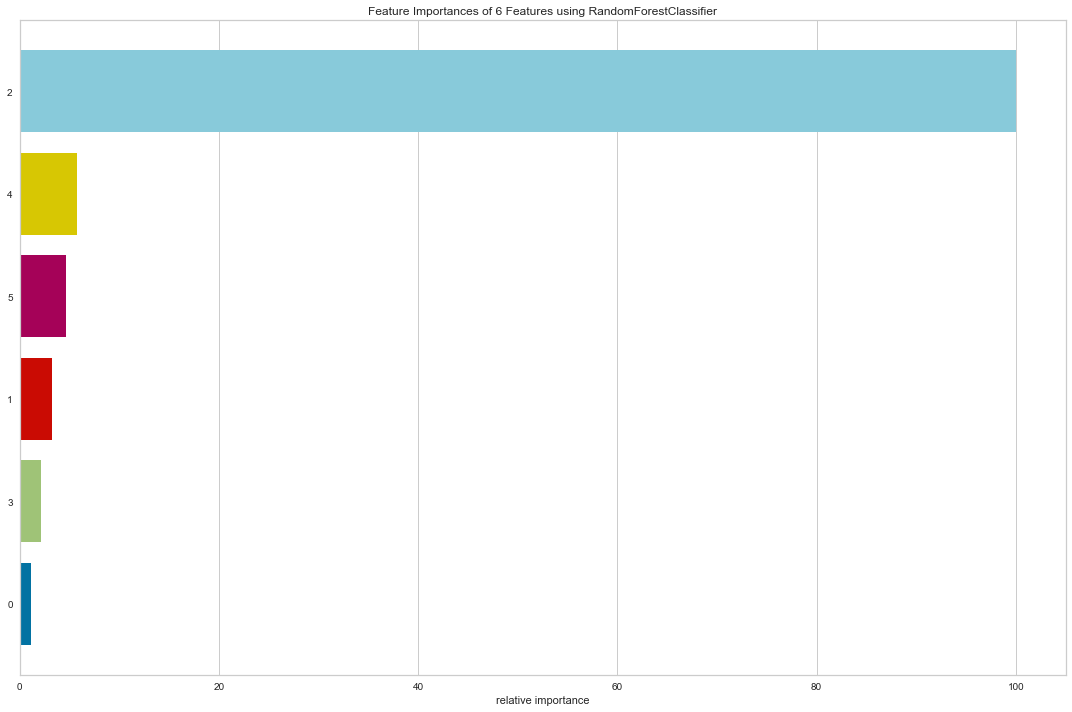

In [8]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.features import FeatureImportances

#feature_names = df_temp[features_names[i] for i in indices]

model = RandomForestClassifier(n_estimators=10)
df_temp = FeatureImportances(model, size=(1080, 720))

df_temp.fit(X, y)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
df_temp.show()